In [1]:
#### Machine Learning Application

In [4]:
##### Machine Learning Logistic Regression with Pima Indians

##### Importation des librairies

from pandas import read_csv
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from  sklearn.linear_model import LogisticRegression


#### Importation du fichier

nom_fichier = 'pima-indians-diabetes.data.csv'
col = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "diabete"]
dataframe = read_csv(nom_fichier, names = col)
array = dataframe.values

In [12]:
#### Première table sur les niveaux de rémunération

data = read_csv("census_income_dataset.csv")
data.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
print(dataframe.groupby(data["income_level"]).size())

In [13]:
#### Deuxième dataset


data_2 = read_csv("school_grades_dataset.csv")
data_2.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [6]:
#array[:, 0:8]

In [7]:
#array[:,8] ##### Modalité de la variable diabète

In [6]:
#### Séparation en jeu de train et de test

X = array[:, 0:8]
Y = array[:, 8]

##### Validation croisée à 10 échantillons et lancement de Logistic Regression

k_echant = KFold(n_splits = 10, random_state = 7)
modele = LogisticRegression()

resultats = cross_val_score(modele, X, Y, cv = k_echant) ##### Mange ces 4 paramètres
print(resultats)

[0.7012987  0.81818182 0.74025974 0.71428571 0.77922078 0.75324675
 0.85714286 0.80519481 0.72368421 0.80263158]


In [7]:
print(dataframe.groupby(dataframe["diabete"]).size())

diabete
0    500
1    268
dtype: int64


In [8]:
print(dataframe.describe())

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age     diabete  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [9]:
print(dataframe.dtypes)

preg         int64
plas         int64
pres         int64
skin         int64
test         int64
mass       float64
pedi       float64
age          int64
diabete      int64
dtype: object


In [10]:
##### Création d'un jeu de test et de validation

from sklearn.model_selection import train_test_split

array = dataframe.values

X = array[:, 0:8].astype(float)
Y = array[:, 8]

validation_size = 0.20
seed = 7

#### Séparation des jeu de train et de test à proportion 80 - 20

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [11]:
X_train.shape

(614, 8)

In [12]:
Y_train.shape

(614,)

In [2]:
#### Machine Learning Kaggle

In [ ]:
##### Lancer plusieurs modèles de machine learning et les comparer

I- Importation des librairie python

In [13]:
import numpy
from matplotlib  import pyplot
from pandas import read_csv 
from pandas import set_option
#from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report   
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
#### Evaluer les algorithmes

# Test options and evaluation metric 

num_folds = 10 
seed = 7 
scoring = 'accuracy'

In [16]:
# Spot-Check Algorithms

models = [] 
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))

NameError: name 'LinearDiscriminantAnalysis' is not defined

In [16]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              presort=False, random_state=None, splitter='best')),
 ('NB', GaussianNB(priors=None)),
 ('SVM', SVC(C

In [15]:
results = [] 
names = [] 
for name, model in models: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    
#     names.append(name) 
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
#     print(msg)
    print(results)

NameError: name 'models' is not defined

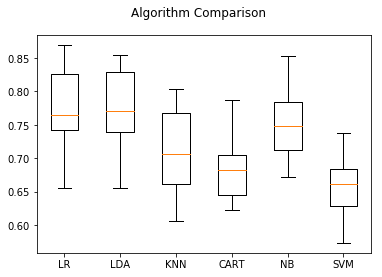

In [18]:
# Compare Algorithms 

fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()


In [19]:
# Tune scaled KNN


scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)

model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)


grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.737785 using {'n_neighbors': 11}
0.701954 (0.075177) with: {'n_neighbors': 1}
0.734528 (0.068135) with: {'n_neighbors': 3}
0.713355 (0.067677) with: {'n_neighbors': 5}
0.731270 (0.069674) with: {'n_neighbors': 7}
0.734528 (0.068908) with: {'n_neighbors': 9}
0.737785 (0.067807) with: {'n_neighbors': 11}
0.734528 (0.074453) with: {'n_neighbors': 13}
0.729642 (0.084373) with: {'n_neighbors': 15}
0.729642 (0.067524) with: {'n_neighbors': 17}
0.726384 (0.072549) with: {'n_neighbors': 19}
0.724756 (0.071717) with: {'n_neighbors': 21}


In [22]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.780130 using {'C': 0.1, 'kernel': 'linear'}
0.780130 (0.055334) with: {'C': 0.1, 'kernel': 'linear'}
0.714984 (0.065472) with: {'C': 0.1, 'kernel': 'poly'}
0.711726 (0.047876) with: {'C': 0.1, 'kernel': 'rbf'}
0.767101 (0.059192) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.780130 (0.060070) with: {'C': 0.3, 'kernel': 'linear'}
0.732899 (0.056577) with: {'C': 0.3, 'kernel': 'poly'}
0.754072 (0.067008) with: {'C': 0.3, 'kernel': 'rbf'}
0.755700 (0.059997) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.778502 (0.061289) with: {'C': 0.5, 'kernel': 'linear'}
0.736156 (0.072558) with: {'C': 0.5, 'kernel': 'poly'}
0.754072 (0.069600) with: {'C': 0.5, 'kernel': 'rbf'}
0.755700 (0.049404) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.778502 (0.061289) with: {'C': 0.7, 'kernel': 'linear'}
0.741042 (0.063253) with: {'C': 0.7, 'kernel': 'poly'}
0.749186 (0.060901) with: {'C': 0.7, 'kernel': 'rbf'}
0.741042 (0.046453) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.778502 (0.061289) with: {'C': 0.9, 'kernel': 'line